<h2 align='center'>| KS Analytical Consulting Data Science Internship Assignment |</h2>
<h5 align='right'>- by D VAMSIDHAR</h5>

### MOTIVATION OF THE PROJECT

<p align='justify'>The motivation of the project is to create a model that predicts "Cerebral Stroke" for an individual based on parameters like age, historical health records like heart diseases, hypertension etc.</p>

### WORKFLOW OF THE PROJECT
<ul>
<li> Discovery
<li> Data Preparation
<li> Model Planning
<li> Model Building
<li> Evaluate the results
<li> Operationalize
</ul>

## DISCOVERY PHASE


In this phase we will explore the raw data before loading it into the workspace and also collect the details of all the tools and libraries needed for the project.

#### Feature available in the dataset
<ol>
<li>ID
<li>Gender
<li>Age
<li>Hypertension
<li>Heart Disease
<li>Marital Status
<li>Work Type
<li>Residence Type
<li>Average Glucose Level
<li>BMI - Body Mass Index
<li>Smoking Status
<li>STROKE( <i>TARGET VARIABLE</i> )
</ol>

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

## DATA PREPARATION PHASE

In [2]:
#loaeding the dataset into the workspace
data = pd.read_csv('dataset.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


Exploring the dataset to gain as many insights as possible.

In [3]:
# this tell the shape of dataset that is number of rows and column in the dataset : (no. of rows, no. of columns)
data.shape

(43400, 12)

In [4]:
#checking for the null values
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [5]:
#removing ID column as it hold no relevancy
data.drop(['id'], axis=1, inplace=True)

In [6]:
# Mapping the Gender column 
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,1.0,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,0.0,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,0.0,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,1.0,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [10]:
#Filling the null values in the gender column on conditions

# Get the number of null values in the gender column
n_null = data['gender'].isnull().sum()

# If the number of null values is small, you can fill them with the mode value
if n_null <= 10:
    data['gender'].fillna(data['gender'].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

gender                  11
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [14]:
# converting the float type age column to int type column

data['age'] = data['age'].astype(int)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3,0,0,No,children,Rural,95.12,18.0,NaN,0
1,1.0,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,0.0,8,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,0.0,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,1.0,14,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [15]:
data['ever_married'].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [16]:
#mapping columns "ever_married", "work_type" and "residence_type" similarly like gender column

data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3,0,0,0,children,Rural,95.12,18.0,NaN,0
1,1.0,58,1,0,1,Private,Urban,87.96,39.2,never smoked,0
2,0.0,8,0,0,0,Private,Urban,110.89,17.6,NaN,0
3,0.0,70,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
4,1.0,14,0,0,0,Never_worked,Rural,161.28,19.1,NaN,0


In [17]:
data['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [18]:
#Labeling work type column accordingly
le = LabelEncoder()

data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3,0,0,0,4,0,95.12,18.0,NaN,0
1,1.0,58,1,0,1,2,1,87.96,39.2,never smoked,0
2,0.0,8,0,0,0,2,1,110.89,17.6,NaN,0
3,0.0,70,0,0,1,2,0,69.04,35.9,formerly smoked,0
4,1.0,14,0,0,0,1,0,161.28,19.1,NaN,0


In [20]:
#filling the null values in the bmi column using median imputation

# Calculate the median BMI
median_bmi = data['bmi'].median()

# Fill the null values in the BMI column with the median BMI
data['bmi'].fillna(median_bmi, inplace=True)

# Save the updated dataset
data.to_csv('updated_dataset.csv', index=False)

In [21]:
# checking for null values in the dataset
data.isnull().sum()

gender                  11
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [22]:
data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [23]:
#Labeling the values of the column before filling the null values
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [24]:
#Filling the null values in the smoking_status column

# Get the number of null values in the smoking_status column
n_null = data['smoking_status'].isnull().sum()

# If the number of null values is small, you can fill them with the mode value
if n_null <= 10:
    data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace=True)

# If the number of null values is large, you can use a more sophisticated imputation method, such as K-nearest neighbors (KNN) imputation
else:
    from sklearn.impute import KNNImputer

    # Create a KNNImputer object
    knn_imputer = KNNImputer(n_neighbors=5)

    # Fit the KNNImputer object to the dataset
    knn_imputer.fit(data)

    # Impute the missing values in the smoking_status column
    data['smoking_status'] = knn_imputer.transform(data)[0]

# Save the updated dataset
data.to_csv('updated_cerebral_stroke_prediction_dataset.csv', index=False)


In [25]:
data['gender'].value_counts()

0.0    25665
1.0    17724
Name: gender, dtype: int64

In [26]:
data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

#### Since the above dataset is unbalanced we need to create a new dataset with sample '1' dataset with similar distribution of that of '0' distribution.

In [28]:
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]

In [29]:
no_stroke_sample = no_stroke.sample(n=783)

In [30]:
#concatinating the dataframes
new_sample_data = pd.concat([stroke, no_stroke_sample], axis=0)

In [31]:
new_sample_data.to_csv('New Sample Data.csv')
new_sample_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,1.0,67,0,1,1,2,1,228.69,36.6,0,1
81,0.0,61,0,0,1,3,0,202.21,27.7,1,1
141,1.0,80,0,1,1,2,0,105.92,32.5,1,1
257,0.0,49,0,0,1,2,1,171.23,34.4,2,1
264,0.0,79,1,0,1,3,0,174.12,24.0,1,1


In [32]:
new_sample_data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
39406,0.0,65,0,0,0,2,0,85.24,26.5,0,0
2253,1.0,71,0,0,1,0,1,56.12,24.7,3,0
28578,1.0,55,0,0,1,2,0,85.91,27.5,1,0
22184,0.0,58,0,0,1,2,1,78.80,32.6,1,0
29120,0.0,29,0,0,1,2,1,138.39,19.5,1,0


In [33]:
new_sample_data['stroke'].value_counts()

1    783
0    783
Name: stroke, dtype: int64

#### Here a new feature can be extracted from the bmi column i.e Obesity status

In [41]:
# Create a new column to indicate whether the person is overweight, underweight, or normal
new_sample_data['BMI_category'] = new_sample_data['bmi'].apply(lambda x: 0 if x >= 25 else 1 if x >= 18.5 else 2)

# 0 -> Overweight; 1-> Normal; 2-> Underweight

# Save the updated dataset
new_sample_data.to_csv('New Sample Data.csv', index=False)

In [42]:
new_sample_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,BMI_category
63,1.0,67,0,1,1,2,1,228.69,36.6,0,1,0
81,0.0,61,0,0,1,3,0,202.21,27.7,1,1,0
141,1.0,80,0,1,1,2,0,105.92,32.5,1,1,0
257,0.0,49,0,0,1,2,1,171.23,34.4,2,1,0
264,0.0,79,1,0,1,3,0,174.12,24.0,1,1,1


## Exploratory Data Anaysis

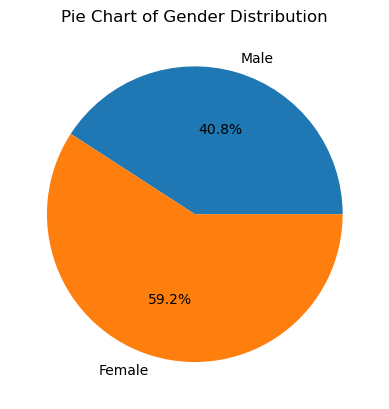

In [35]:
# Gender distribution

n_male = data['gender'].value_counts()[1]
n_female = data['gender'].value_counts()[0]

plt.pie([n_male, n_female], labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title("Pie Chart of Gender Distribution")
plt.show()

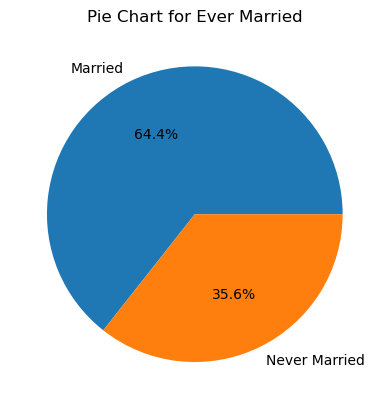

In [37]:
# Marital Status

n_ever_married = data['ever_married'].value_counts()[1]
never_married = data['ever_married'].value_counts()[0]

plt.pie([n_ever_married, never_married], labels=['Married', 'Never Married'], autopct="%1.1f%%")
plt.title("Pie Chart for Ever Married")
plt.show()

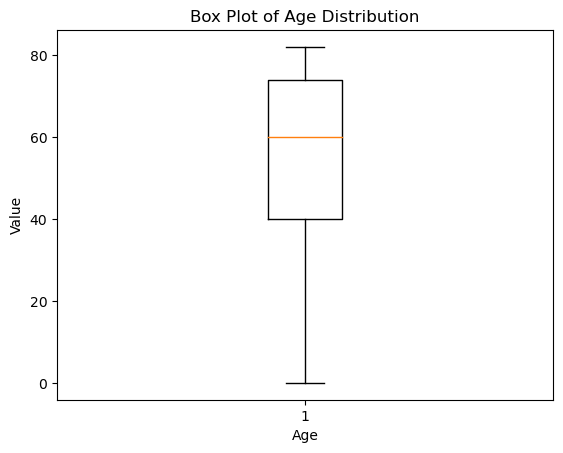

In [43]:
#Box plot for age distribution

plt.boxplot(new_sample_data['age'])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

#### Splitting the data into Training data and Testing data

In [44]:
X = new_sample_data.drop(columns='stroke',axis=1)
Y = new_sample_data['stroke']

In [45]:
print(X)

       gender  age  hypertension  heart_disease  ever_married  work_type  \
63        1.0   67             0              1             1          2   
81        0.0   61             0              0             1          3   
141       1.0   80             0              1             1          2   
257       0.0   49             0              0             1          2   
264       0.0   79             1              0             1          3   
...       ...  ...           ...            ...           ...        ...   
39406     0.0   65             0              0             0          2   
2253      1.0   71             0              0             1          0   
28578     1.0   55             0              0             1          2   
22184     0.0   58             0              0             1          2   
29120     0.0   29             0              0             1          2   

       Residence_type  avg_glucose_level   bmi  smoking_status  BMI_category  
63      

In [46]:
print(Y)

63       1
81       1
141      1
257      1
264      1
        ..
39406    0
2253     0
28578    0
22184    0
29120    0
Name: stroke, Length: 1566, dtype: int64


In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)


(1566, 11) (1252, 11) (314, 11)


In [49]:
logistic_model = LogisticRegression()

In [50]:
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [51]:
X_train_prediction = logistic_model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_accuracy)

0.7667731629392971


In [52]:
#prediction and accuracy score for test data
X_test_prediction = logistic_model.predict(X_test)
training_accuracy = accuracy_score(X_test_prediction, Y_test)
print(training_accuracy)

0.7611464968152867


##### Using Random Forest Classifier

In [53]:
random_model = RandomForestClassifier()

In [54]:
random_model.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
X_train_prediction = random_model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_accuracy)

1.0


In [59]:
#prediction and accuracy score for test data
X_test_prediction = random_model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, Y_test)
print(testing_accuracy)

0.7484076433121019


Using Decision Tree Classifier

In [60]:
decision_model = DecisionTreeClassifier()

In [61]:
decision_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [62]:
X_train_prediction = decision_model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_accuracy)

1.0


In [63]:
#prediction and accuracy score for test data
X_test_prediction = decision_model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, Y_test)
print(testing_accuracy)

0.6751592356687898
